In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2_contingency, chi2 
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg


In [2]:
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-rom-fadeev/Проект_2_groups.csv', sep=" ")
group_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-rom-fadeev/Проект_2_group_add.csv')
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-rom-fadeev/Проект_2_checks.csv')
active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-rom-fadeev/Проект_2_active_studs.csv')

In [3]:
#                    Приводим датафреймы к удобочитаемому виду т.к данные были получены в ненадлежащем

In [4]:
# groups.columns
groups = groups.rename(columns={"id;grp": "idgrp"})
groups[['id','grp']] = groups.idgrp.str.split(";",expand=True)
groups.drop('idgrp', axis= 1 , inplace= True ) 
groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [5]:
checks.columns
checks = checks.rename(columns={'student_id;"rev"': "student_idrev"})
checks[['student_id','rev']] = checks.student_idrev.str.split(";",expand=True)
checks.drop('student_idrev', axis= 1 , inplace= True ) 
checks

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [6]:
                                       # объеденение всех пользователей(groups + group_add) в один df

In [7]:
all_group = pd.concat([groups,group_add])
all_group = all_group.rename(columns={'id': "student_id"})
all_group['student_id'] = all_group['student_id'].astype(int)
all_group.dtypes

student_id     int64
grp           object
dtype: object

In [8]:
# Проверяем на уникальность пользователем .drop_duplicates()
# all_group
# .drop_duplicates(subset = ['student_id'])
# all_group.drop_duplicates(subset = ['student_id'])
# all_group

In [9]:
# изменение типа данных для сращивания таблиц checks и active_studs
checks['student_id'] = checks['student_id'].astype(int)
# checks_active_studs['rev'] = checks_active_studs['rev'].astype(float)
checks.dtypes

student_id     int64
rev           object
dtype: object

In [10]:
active_studs.dtypes

student_id    int64
dtype: object

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [11]:
checks.shape

(541, 2)

In [12]:
active_studs.shape

(8341, 1)

In [13]:
# Проверяем на уникальность пользователем .drop_duplicates()
# active_studs
# active_studs.drop_duplicates(subset = ['student_id'])
# active_studs

In [14]:
#При проверки через merge выяснилось, что не все пользователи производили оплату через платформу
# всего оплатили 541, через платформу 392
# 541-392 = 149 - оплатили иначе либо оплата была отменена(но этих данных у меня нет)

In [15]:
# checks_active_studs = active_studs.merge(checks, how='outer', on='student_id')
# checks_active_studs.shape

In [16]:
# через платформу оплатили 392 пользователя
# checks_active_studs = active_studs.merge(checks, how='inner', on='student_id')
# checks_active_studs.shape

In [17]:
# всего оплатили 541
# checks_active_studs = active_studs.merge(checks, how='right', on='student_id')
# checks_active_studs.shape

In [18]:
checks_active_studs = active_studs.merge(checks, how='left', on='student_id')
checks_active_studs.shape

(8341, 2)

In [19]:
checks_active_studs = checks_active_studs.fillna(0)
checks_active_studs['rev'] = checks_active_studs['rev'].astype(float)
checks_active_studs


,student_id,rev
0,581585,0.0
1,5723133,0.0
2,3276743,0.0
3,4238589,0.0
4,4475369,0.0
...,...,...
8336,1794344,0.0
8337,296883,0.0
8338,3598448,0.0
8339,3610547,290.0


In [20]:
# получаем всех купивших пользователей зашедших на платформу
checks_active_studs_all_group = all_group.merge(checks_active_studs, how='inner', on='student_id')
all_checks_by_groups = checks_active_studs_all_group.query('rev != 0')
all_checks_by_groups


,student_id,grp,rev
0,1627,A,990.0000
10,100300,B,990.0000
12,108270,B,290.0000
246,264473,B,1900.0001
279,274352,B,690.0000
...,...,...,...
8312,5645737,B,1900.0000
8314,5651566,B,1900.0000
8316,5662322,B,1900.0000
8323,5681918,B,1900.0000


In [21]:
# проверяем пересекаются ли элементы в группах
gr_A = set(checks_active_studs_all_group.query('grp== "A"').student_id)
gr_B = set(checks_active_studs_all_group.query('grp== "B"').student_id)


gr_A.intersection(gr_B)

set()

In [22]:
# Количество оплат у активных пользователей на пользователя = 1(нет ошибочных-задвоенных)
all_payment_on_user = all_checks_by_groups.groupby(['grp', 'student_id'], as_index=False).size()
all_payment_on_user
# all_payment_on_user.sort_values('size', ascending=False)

,grp,student_id,size
0,A,1627,1
1,A,287008,1
2,A,332387,1
3,A,347455,1
4,A,445767,1
...,...,...,...
387,B,5645737,1
388,B,5651566,1
389,B,5662322,1
390,B,5681918,1


In [23]:
checks_active_studs_all_group['rev'] = checks_active_studs_all_group.rev.apply(lambda x: 'not_check' if x == 0.0 else 'check')
checks_active_studs_all_group

,student_id,grp,rev
0,1627,A,check
1,2085,B,not_check
2,2215,B,not_check
3,3391,A,not_check
4,3401,B,not_check
...,...,...,...
8336,5760471,B,not_check
8337,5777081,B,not_check
8338,5870856,A,not_check
8339,5945085,B,not_check


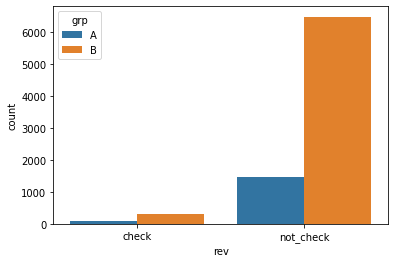

In [24]:
sns.countplot(data=checks_active_studs_all_group, x="rev", hue="grp")

In [25]:

pd.crosstab(checks_active_studs_all_group.grp, checks_active_studs_all_group.rev)

rev,check,not_check
grp,,
A,78,1460
B,314,6489


In [26]:
# т.к конверсия, то используем Хи2. Значимо ли изменение пропорций(78	1460, 314	6489 ) ?
#  cramer(0-1) - различия очень маленькие(0.007) 
#Хи2 показал что нулева гипотеза не отклоняется тк 0.48(много больше 0.05)
# Вывод:Увеличение покупок связано с бОльшим количеством пользователей группы В(Группа В больше примерно в 4 раза)


In [27]:
stats,exp, p = pg.chi2_independence(checks_active_studs_all_group, x="grp", y="rev")
p

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.484808,1.0,0.486252,0.007624,0.107123
1,cressie-read,0.666667,0.482018,1.0,0.487510,0.007602,0.106787
2,log-likelihood,0.000000,0.476541,1.0,0.489993,0.007559,0.106127
3,freeman-tukey,-0.500000,0.472522,1.0,0.491829,0.007527,0.105643
4,mod-log-likelihood,-1.000000,0.468578,1.0,0.493642,0.007495,0.105168
5,neyman,-2.000000,0.460909,1.0,0.497200,0.007434,0.104245


In [28]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(checks_active_studs_all_group.grp, checks_active_studs_all_group.rev))
p

0.48625240457231045

In [ ]:
#                                            Вывод:
# Изначально обращаю внимание на конверсию(отношение пользователь/покупатель) т.к при анализе было выявленно, что 
# в тестовую группу B(активных user-ов, в дни проведения теста) попало больше пользователей(примерно в 4 раза). 
# Для конверсии использую Хи2,который показывает, что статичтически значимых различий не выявленно и нулевая гипотеза остается
# рабочей(при p-val = 0.48).
# Запуск новой механики оплаты,  даже без учета затрат на ее реализацию, нецелесообразен.